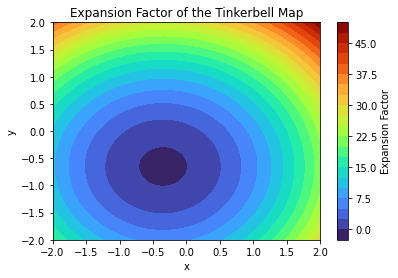

In [2]:
#import functions
import numpy as np
import matplotlib.pyplot as plt

#define map

def tinkerbell(x,p):
    x1 = np.empty(2)
    x1[0] = x[0]**2 -x[1]**2 +p[0]*x[0] +p[1]*x[1]
    x1[1] = 2.*x[0]*x[1] + p[2]*x[0] + p[3]*x[1]
    return x1

#define initial values

p = [0.9, -0.6013, 2.0, 0.5]

#define ranges for x and y

x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-2, 2, 400)

#define + return jacobian

def jacobian(x, p):
    p = [0.9, -0.6013, 2.0, 0.5]
    x_dx = 2 * x[0] + p[0]
    x_dy = -2 * x[1] + p[1]
    y_dx = 2 * x[1] + p[2]
    y_dy = 2 * x[0] + p[3]
    return np.array([[x_dx, x_dy], [y_dx, y_dy]])

#define expansion factor

def expansion(x, p):
    return np.linalg.det(jacobian(x, p))

def expansion_factor():

    x_vals, y_vals = np.meshgrid(x_range, y_range)
    z = np.zeros_like(x_vals)

    for i in range(400):
        for j in range(400):
            x = np.array([x_vals[i, j], y_vals[i, j]])
            z[i, j] = expansion(x, p)

#plot expansion factor, to make the levels more distinguished, lower the "levels" variable.

    plt.figure()
    plt.contourf(x_vals,y_vals, z, levels=20, cmap='turbo')
    plt.colorbar(label='Expansion Factor')
    plt.title('Expansion Factor of the Tinkerbell Map')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


expansion_factor()